In [35]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# Define the population distribution
mu = 1
sigma = 1

# Get random samples
N = 10
X = np.random.normal(mu, sigma, N)

# Compute the sample mean
X_bar = X.mean()

# Compute the sample std
S_bar = np.sqrt((1/(N-1))*np.sum((X-X_bar)**2)) # same as S = X.std(ddof=1);

# Compute the t-statistic 
t = X_bar*np.sqrt(N)/S_bar

# The p-value is the probabilty of obtaining the t-statistic under the null 
# hypothesis; that is, 1 minus the cdf of the t-distribution, given n-1 degrees 
# of freedom (multiplied by two because we are looking at two symmetric tails)
p = 2.*(1-st.t.cdf(t, N-1))

# Compare to what we get from ttest_1samp
tstat, pval = st.ttest_1samp(X, 0)

print(f't = {t:.4f} (computed) {tstat:.4f} (from ttest_1samp)')
print(f'p = {p:.4f} (computed) {pval:.4f} (from ttest_1samp)')

t = 1.7332 (computed) 1.7332 (from ttest_1samp)
p = 0.1171 (computed) 0.1171 (from ttest_1samp)


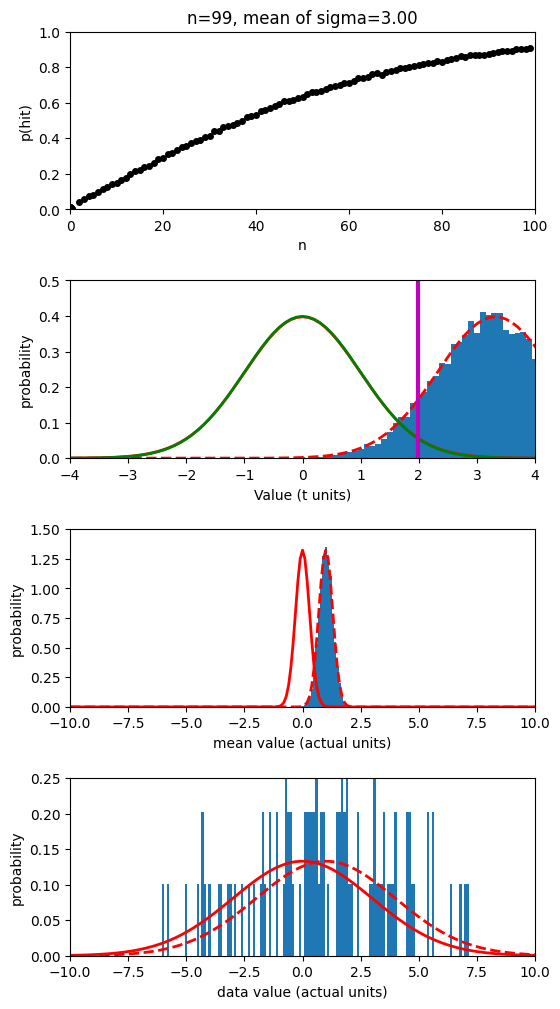

In [3]:

# Define a test distribution with a population mean different than 0 and a std of >1
test_mu  = 1
test_std = 3

# Null distribution
null_mu  = 0
null_std = test_std

# Max number of samples
max_n = 100

# for histograms
data_bin_size = 0.1
data_bins = np.arange(-10-data_bin_size/2, 10+1.5*data_bin_size, data_bin_size)
dax = (data_bins[1:] + data_bins[:-1])/2

# for simulations 
num_experiments = 10000

# Set up figure
fig, axs = plt.subplots(4, 1, figsize=(6, 12))
fig.subplots_adjust(hspace=0.4)

# Simulate different sample sizes
for n in np.arange(2, max_n):

    # Clear figures
    plt.axes(axs[1]).cla()
    plt.axes(axs[2]).cla()
    plt.axes(axs[3]).cla()

    # Simulate multiple experiments
    samples = np.random.normal(test_mu, test_std, (num_experiments, n))

    # Compute the t-statistic from each experient
    t_stats = samples.mean(axis=1)/samples.std(axis=1,ddof=1)*np.sqrt(n)

     # Top plot is probability of identifying a real effect as a function of n
    plt.axes(axs[0]).axis([0, max_n, 0, 1])
    plt.plot(0, 0, 'ko')
    plt.xlabel('n')
    plt.ylabel('p(hit)')
    plt.axes(axs[0]).plot(n, np.count_nonzero(t_stats>st.t.ppf(0.975, n-1))/num_experiments, 'k.', markersize=8)
    plt.title(f'n={n}, mean of sigma={samples.std(axis=1, ddof=1).mean():.2f}')

    # Second-to-top plot is normal, t distributions of mean, and samples
    counts, edges = np.histogram(t_stats, data_bins)
    plt.axes(axs[1]).bar(dax, np.divide(counts, np.trapz(counts, dax)), width=0.1)
    plt.plot(dax, st.t.pdf(dax, n-1), 'r-', linewidth=2)
    plt.plot(dax, st.t.pdf(dax-test_mu/test_std*np.sqrt(n), n-1), 'r--', linewidth=2)
    plt.plot(dax, st.norm.pdf(dax, 0, 1), 'g-', linewidth=2)
    plt.plot(st.t.ppf(0.975, n-1)*np.array([1.0, 1.0]), [0, 0.5], 'm-', linewidth=3)

    # set/label axes
    plt.axis([-4, 4, 0, 0.5])
    plt.xlabel('Value (t units)')
    plt.ylabel('probability')

    # Second-to-bottom plot is distributions of means
    counts, edges = np.histogram(samples.mean(axis=1), data_bins)
    plt.axes(axs[2]).bar(dax, np.divide(counts, np.trapz(counts, dax)), width=0.1)
    plt.plot(dax, st.norm.pdf(dax, null_mu, null_std/np.sqrt(n)), 'r-', linewidth=2)
    plt.plot(dax, st.norm.pdf(dax, test_mu, test_std/np.sqrt(n)), 'r--', linewidth=2)

    # set/label axes
    plt.axis([-10, 10, 0, 1.5])
    plt.xlabel('mean value (actual units)')
    plt.ylabel('probability')      

    # Bottom plot is null, test distributions. Show one 'experiment'
    counts, edges = np.histogram(samples[0,:], bins=data_bins)
    plt.axes(axs[3]).bar(dax, np.divide(counts, np.trapz(counts, dax)), width=0.1)
    plt.plot(dax, st.norm.pdf(dax, null_mu, null_std), 'r-', linewidth=2)
    plt.plot(dax, st.norm.pdf(dax, test_mu, test_std), 'r--', linewidth=2)

    # set/label axes
    plt.axis([-10, 10, 0, 0.25])
    plt.xlabel('data value (actual units)')
    plt.ylabel('probability')      

    # Clear for next plot
    display(fig)
    clear_output(wait=True)

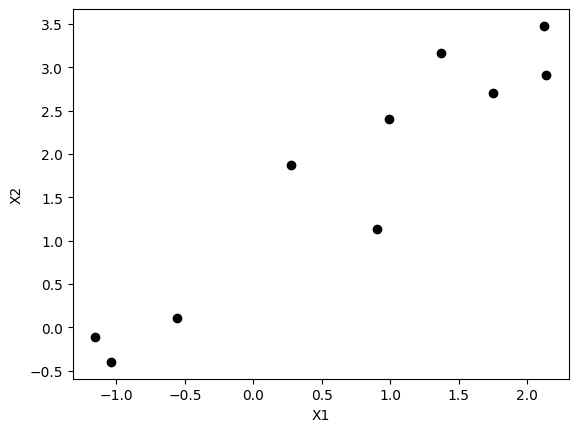

variance=0.2408 (computed), 0.2408 (python function)
t = 6.7412 (computed) 6.7412 (python function)
p = 0.0001 (computed) 0.0001 (python function)


In [5]:
# Define paired measurements in terms of a difference and then additive 0-mean noise
mu          = 1
sigma       = 1
mu_diff     = 1
mu_noise    = 0
sigma_noise = 0.5

# Get random samples
N = 10
X1 = np.random.normal(mu, sigma, N)
X2 = X1 + mu_diff + np.random.normal(mu_noise, sigma_noise, N)

# Compute the difference
D = X2 - X1

# Note that X1 and X2 are highly correlated (see figure), so the variance (or std) of the difference needs to take into account the covariance
# var(X2 - X1) = cov(X2 - X1, X2 - X1)
#              = cov(X2, X2) + cov(X1, X1) - cov(X2, X1) - cov(X1, X2)
#              = var(X2) + var(X1) - cov(X2,X1) - cov(X1,X2)
plt.plot(X1, X2, 'ko', markerfacecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
cov = np.cov(X1, X2)
print(f'variance={cov[0,0]+cov[1,1]-cov[0,1]-cov[1,0]:.4f} (computed), {D.var(ddof=1):.4f} (python function)')

# Compute the t-statistic 
t_D = D.mean()*np.sqrt(N)/D.std(ddof=1)

# The p-value is the probabilty of obtaining the t-statistic under the null hypothesis; that is, 1 minus the cdf of the t-distribution, given n-1 degrees of freedom (multiplied by two because we are looking at two symmetric tails)
p_D = 2.*(1-st.t.cdf(t_D, N-1))

# Compare to what we get from ttest
tstat, pval = st.ttest_1samp(D, 0)

print(f't = {t_D:.4f} (computed) {tstat:.4f} (python function)')
print(f'p = {p_D:.4f} (computed) {pval:.4f} (python function)')

In [6]:
# Define unpaired measurements, same sigma
mu_1 = 1
mu_2 = 2
sigma = 1

# Get random samples, same n
N = 10
X1 = np.random.normal(mu_1, sigma, N)
X2 = np.random.normal(mu_2, sigma, N)

# Compute test statistic
Sp = np.sqrt((X1.var(ddof=1) + X2.var(ddof=1))/2)
t_U = (X1.mean()-X2.mean())/(Sp*np.sqrt(2/N))

# The p-value is the probabilty of obtaining the t-statistic under the null hypothesis; that is, 1 minus the cdf of the t-distribution, given n-1 degrees of freedom (multiplied by two because we are looking at two symmetric tails)
p_U = 2.*(1-st.t.cdf(abs(t_U), 2*N-2))

# Compare to what we get from ttest (use ttest_ind for two independent samples)
tstat, pval = st.ttest_ind(X1, X2)

print(f't = {t_U:.4f} (computed) {tstat:.4f} (python function)')
print(f'p = {p_U:.4f} (computed) {pval:.4f} (python function)')

t = -2.1216 (computed) -2.1216 (python function)
p = 0.0480 (computed) 0.0480 (python function)


Text(0, 0.5, 'P_error')

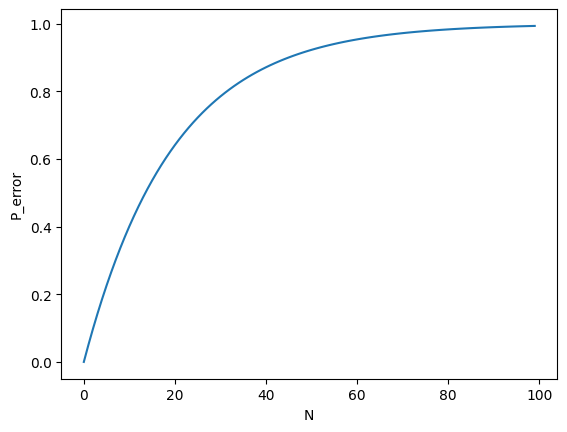

In [9]:
#probability of getting a Type I error under these conditions grows rapidly with N, 
#implying that it becomes very, very likely that you will get a "statistically significant result" just by chance if you do enough tests
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.05
N = np.arange(0,100)
plt.plot(N, 1-(1-alpha)**N)
plt.xlabel('N')
plt.ylabel('P_error')

In [36]:
#Exercise 

#simulate multiple (say, 1000) t-tests comparing two samples with equal means and standard deviations and save the p-values


# Function to simulate t-tests
def simulate_t_tests(n_samples, sample_size, mean1, mean2, std_dev):
    p_values = []
    
    for _ in range(n_samples):
        sample1 = np.random.normal(loc=mean1, scale=std_dev, size=sample_size)
        sample2 = np.random.normal(loc=mean2, scale=std_dev, size=sample_size)
        t_stat, p_value = st.ttest_ind(sample1, sample2)
        p_values.append(p_value)
    
    return np.array(p_values)

#two samples with equal means and standard deviations
n_samples = 1000
sample_size = 50
mean1 = 2
mean2 = 2
std_dev = 1

p_values_equal_means = simulate_t_tests(n_samples, sample_size, mean1, mean2, std_dev)

# Proportion of significant results (P values)
proportion_significant_equal_means = np.sum(p_values_equal_means < 0.05) / n_samples
print(f'Proportion of significant results with equal means: {proportion_significant_equal_means:.4f}')


Proportion of significant results with equal means: 0.0460


In [39]:
#correct multiple comparisons

# Bonferroni correction
bonferroni_alpha = 0.05 / n_samples
bonferroni_significant = np.sum(p_values_equal_means < bonferroni_alpha)

#Benjamini-Hochberg
sorted_p_values = np.sort(p_values_equal_means)
bh_critical_values = (np.arange(1, n_samples + 1) / n_samples) * 0.05
bh_rejections = sorted_p_values < bh_critical_values
bh_significant = np.sum(bh_rejections)

print(f'Bonferroni significant results: {bonferroni_significant}')
print(f'Benjamini-Hochberg significant results: {bh_significant}')


Bonferroni significant results: 0
Benjamini-Hochberg significant results: 0


In [40]:
#What if means are 1 and 2

# Function to simulate t-tests
def simulate_t_tests(n_samples, sample_size, mean1, mean2, std_dev):
    p_values = []
    
    for _ in range(n_samples):
        sample1 = np.random.normal(loc=mean1, scale=std_dev, size=sample_size)
        sample2 = np.random.normal(loc=mean2, scale=std_dev, size=sample_size)
        t_stat, p_value = st.ttest_ind(sample1, sample2)
        p_values.append(p_value)
    
    return np.array(p_values)

#two samples with equal means and standard deviations
n_samples = 1000
sample_size = 50
mean1 = 1
mean2 = 2
std_dev = 1

p_values_equal_means = simulate_t_tests(n_samples, sample_size, mean1, mean2, std_dev)

# Proportion of significant results (P values)
proportion_significant_equal_means = np.sum(p_values_equal_means < 0.05) / n_samples
print(f'Proportion of significant results with equal means: {proportion_significant_equal_means:.4f}')

# Bonferroni correction
bonferroni_alpha = 0.05 / n_samples
bonferroni_significant = np.sum(p_values_equal_means < bonferroni_alpha)

#Benjamini-Hochberg
sorted_p_values = np.sort(p_values_equal_means)
bh_critical_values = (np.arange(1, n_samples + 1) / n_samples) * 0.05
bh_rejections = sorted_p_values < bh_critical_values
bh_significant = np.sum(bh_rejections)

print(f'Bonferroni significant results: {bonferroni_significant}')
print(f'Benjamini-Hochberg significant results: {bh_significant}')



Proportion of significant results with equal means: 0.9990
Bonferroni significant results: 746
Benjamini-Hochberg significant results: 999


In [41]:
#What if means are 1 and 100

# Function to simulate t-tests
def simulate_t_tests(n_samples, sample_size, mean1, mean2, std_dev):
    p_values = []
    
    for _ in range(n_samples):
        sample1 = np.random.normal(loc=mean1, scale=std_dev, size=sample_size)
        sample2 = np.random.normal(loc=mean2, scale=std_dev, size=sample_size)
        t_stat, p_value = st.ttest_ind(sample1, sample2)
        p_values.append(p_value)
    
    return np.array(p_values)

#two samples with equal means and standard deviations
n_samples = 1000
sample_size = 50
mean1 = 1
mean2 = 100
std_dev = 1

p_values_equal_means = simulate_t_tests(n_samples, sample_size, mean1, mean2, std_dev)

# Proportion of significant results (P values)
proportion_significant_equal_means = np.sum(p_values_equal_means < 0.05) / n_samples
print(f'Proportion of significant results with equal means: {proportion_significant_equal_means:.4f}')

# Bonferroni correction
bonferroni_alpha = 0.05 / n_samples
bonferroni_significant = np.sum(p_values_equal_means < bonferroni_alpha)

#Benjamini-Hochberg
sorted_p_values = np.sort(p_values_equal_means)
bh_critical_values = (np.arange(1, n_samples + 1) / n_samples) * 0.05
bh_rejections = sorted_p_values < bh_critical_values
bh_significant = np.sum(bh_rejections)

print(f'Bonferroni significant results: {bonferroni_significant}')
print(f'Benjamini-Hochberg significant results: {bh_significant}')



Proportion of significant results with equal means: 1.0000
Bonferroni significant results: 1000
Benjamini-Hochberg significant results: 1000


In [ ]:
#As the difference in mean increases, the Bonferroni and Benjamini-Hochberg values become the same